# Dataset Exploration
In this notebook, we explore the time series segmentation datasets.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../../")

from tqdm import tqdm
from itertools import product

In [3]:
from src.utils import load_dataset

Let's load and list the datasets.

In [4]:
df_ts = load_dataset("SleepDB")
df_ts

,name,window_size,change_points,time_series
0,SleepDB_SubjectST7011J0-PSG_EEG_Fpz-Cz,100,"[156000, 165000, 222000, 234000, 240000, 24600...","[-1.8311664530309967e-07, -1.8311664530309967e..."
1,SleepDB_SubjectST7011J0-PSG_EEG_Pz-Oz,100,"[156000, 165000, 222000, 234000, 240000, 24600...","[-1.8311664530309967e-07, -1.8311664530309967e..."
2,SleepDB_SubjectST7011J0-PSG_EOG_horizontal,100,"[156000, 165000, 222000, 234000, 240000, 24600...","[-1.8311664530309967e-07, -1.8311664530309967e..."
3,SleepDB_SubjectST7011J0-PSG_EMG_submental,100,"[156000, 165000, 222000, 234000, 240000, 24600...","[-1.8311664530309967e-07, -1.8311664530309967e..."
4,SleepDB_SubjectST7022J0-PSG_EEG_Fpz-Cz,100,"[63000, 90000, 99000, 120000, 183000, 207000, ...","[-9.430507233107494e-05, -9.430507233107494e-0..."
5,SleepDB_SubjectST7022J0-PSG_EEG_Pz-Oz,100,"[63000, 90000, 99000, 120000, 183000, 207000, ...","[-9.430507233107494e-05, -9.430507233107494e-0..."
6,SleepDB_SubjectST7022J0-PSG_EOG_horizontal,100,"[63000, 90000, 99000, 120000, 183000, 207000, ...","[-9.430507233107494e-05, -9.430507233107494e-0..."
7,SleepDB_SubjectST7022J0-PSG_EMG_submental,100,"[63000, 90000, 99000, 120000, 183000, 207000, ...","[-9.430507233107494e-05, -9.430507233107494e-0..."
8,SleepDB_SubjectST7041J0-PSG_EEG_Fpz-Cz,100,"[93000, 153000, 156000, 162000, 168000, 180000...","[-0.0008941585790148324, -0.000894158579014832..."
9,SleepDB_SubjectST7041J0-PSG_EEG_Pz-Oz,100,"[93000, 153000, 156000, 162000, 168000, 180000...","[-0.0008941585790148324, -0.000894158579014832..."


Let's visualize by time series length, amount of change points and window size.

In [5]:
names = df_ts.name.to_numpy().tolist()

for idx, name in enumerate(names):
    if name == "PigInternalBleedingDatasetAirwayPressure":
        names[idx] = "PigAirwayPressure"
        
    if name == "PigInternalBleedingDatasetArtPressureFluidFilled":
        names[idx] = "PigFluidFilled"
        
    if name == "PigInternalBleedingDatasetCVP":
        names[idx] = "PigCVP"
        
    if name == "ChlorineConcentration":
        names[idx] = "Chlorine"
        
    if name == "DiatomSizeReduction":
        names[idx] = "DiatomSize"
        
    if name == "DistalPhalanxOutlineAgeGroup":
        names[idx] = "DistalPhalanx"
        
    if name == "InsectWingbeatSound":
        names[idx] = "InsectWingbeat"
        
    if name == "LargeKitchenAppliances":
        names[idx] = "LargeKitchen"
        
    if name == "NonInvasiveFetalECGThorax1":
        names[idx] = "ECGThorax1"
        
    if name == "NonInvasiveFetalECGThorax2":
        names[idx] = "ECGThorax2"
        
    if name == "ProximalPhalanxOutlineAgeGroup":
        names[idx] = "ProximalPhalanx"
        
names = np.array(names)

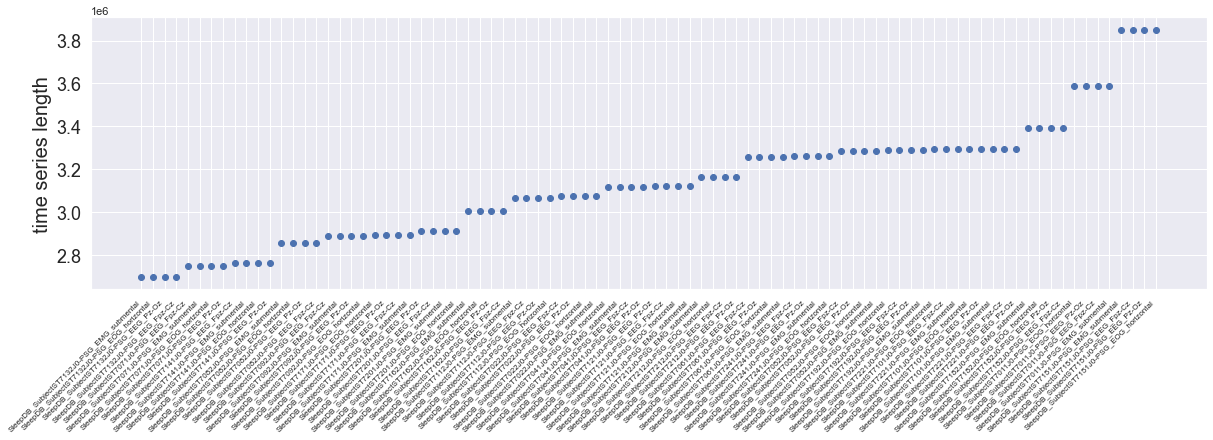

In [6]:
fontsize = 18

idx_sizes = np.argsort(df_ts.time_series.apply(len)).to_numpy()
_, ax = plt.subplots(1, figsize=(20,5))
ax.scatter(np.arange(df_ts.shape[0]), df_ts.time_series.apply(len).to_numpy()[idx_sizes])
ax.set_ylabel("time series length", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.xticks(range(df_ts.shape[0]), names[idx_sizes], rotation = 45, ha="right", fontsize=8)

plt.show()

{82: 4, 84: 4, 101: 4, 108: 4, 112: 4, 115: 8, 126: 4, 128: 4, 136: 8, 138: 4, 141: 8, 147: 4, 160: 4, 170: 4, 177: 4, 179: 4, 189: 4, 193: 4, 230: 4}


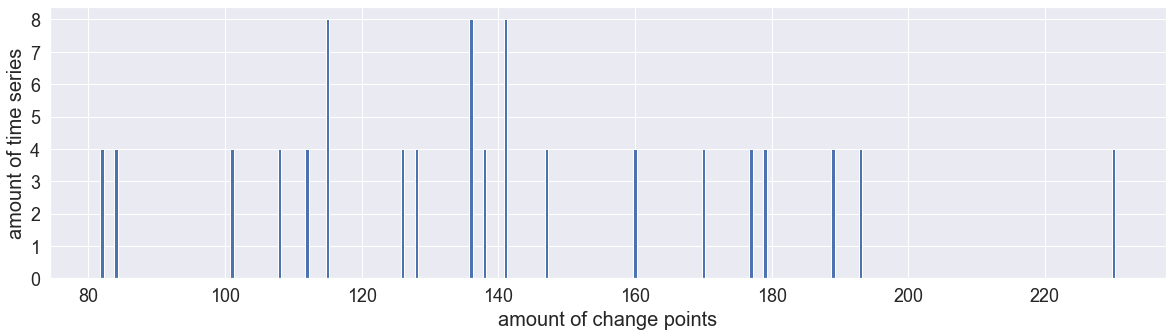

In [7]:
fontsize = 18

change_points, counts = np.unique(df_ts["change_points"].apply(len), return_counts=True)
_, ax = plt.subplots(1, figsize=(20,5))
ax.bar(change_points, counts, width=.5)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
print(dict(zip(change_points, counts)))

ax.set_xlabel("amount of change points", fontsize=20)
ax.set_ylabel("amount of time series", fontsize=20)

plt.show()

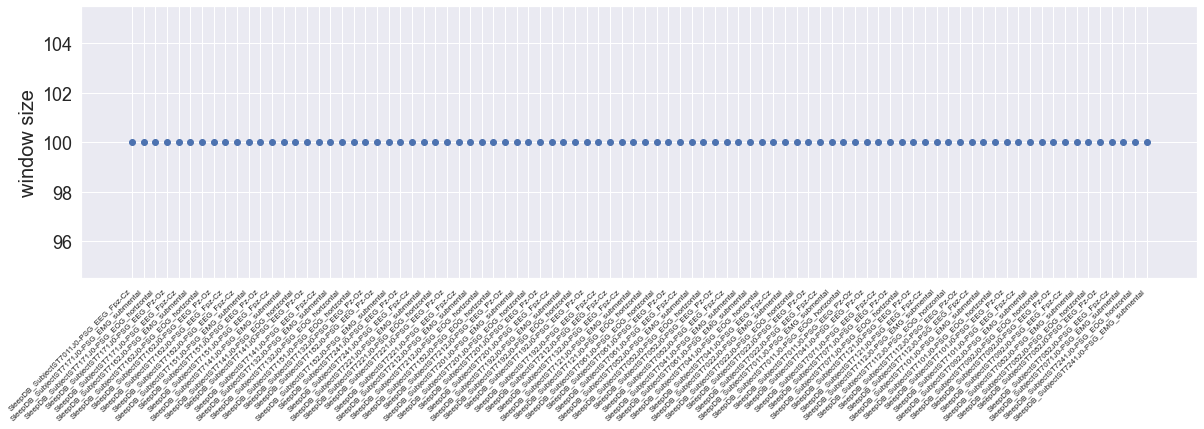

In [8]:
fontsize = 18

idx_sizes = np.argsort(df_ts.window_size.to_numpy())
_, ax = plt.subplots(1, figsize=(20,5))
ax.scatter(np.arange(df_ts.shape[0]), df_ts.window_size.to_numpy()[idx_sizes])
ax.set_ylabel("window size", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.xticks(range(df_ts.shape[0]), names[idx_sizes], rotation = 45, ha="right", fontsize=8)

plt.show()

In [9]:
df_ts.window_size.median()

100.0

In [10]:
df_ts.time_series.apply(len).min()

2698000

In [11]:
df_ts.time_series.apply(len).median()

3118000.0

In [12]:
df_ts.time_series.apply(len).max()

3851000

In [13]:
df_ts["change_points"].apply(len).min()

82

In [14]:
df_ts["change_points"].apply(len).median()

137.0

In [15]:
df_ts["change_points"].apply(len).max()

230

In [16]:
df_ts.shape

(88, 4)